<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#env-set-up" data-toc-modified-id="env-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>env set-up</a></span></li><li><span><a href="#functions" data-toc-modified-id="functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>functions</a></span></li><li><span><a href="#data-exploration" data-toc-modified-id="data-exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data exploration</a></span></li><li><span><a href="#effect-of-initial-condition" data-toc-modified-id="effect-of-initial-condition-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>effect of initial condition</a></span></li></ul></div>

# env set-up

In [1]:
library(repr) ; options(repr.plot.width=18, repr.plot.height= 10) ## change plot default parameter in Jupyter
source("../code/func.R") ## import lib, model, func
rAw = read.csv("../result/maxYield_all.csv", header=T) ## analytical scan
dIs = read.csv("../result/discrepancy.csv", header = T) ## discrepancies scan (analytical solve vs integration)
nUm = cbind(dIs[,1:9],dIs[,10:13]+rAw[,10:13]) ## get back numerical solution
dim(rAw)

[1] 1234321      13

In [2]:
cRaAna = rAw[which(rAw[,12]<=0),] ## data predicted to be negative (bc only B is possible to be negative)
cRaNum = nUm[which(nUm[,10]<=0 | nUm[,11]<=0 | nUm[,12]<=0 | nUm[,13]<=0),] ## data actually not positive

# functions

In [3]:
hIst = function(i){hist(dIsc[,i], main=paste0("Crashed system with ",colnames(dIsc)[i]), xlab=paste0("values of ",colnames(dIsc)[i]), cex.axis=1.5, cex.lab=1.5, cex.main=3)}

In [4]:
ebcPlt1 = function(edTm=1e3, iPop=1e-12, row=1, df=dIsc){
    pA = as.numeric(unname(df[row,1:9]))
    rEs = ebcData(endTime=edTm, iniPop=iPop, parameter=pA)
    vEc = c()
    for(i in 2:ncol(rEs)){vEc = c(vEc,rEs[,i])};rm(i)
    if(rEs[nrow(rEs),1]<edTm*.7){
        ymax = unname(quantile(vEc,prob=.55, na.rm=T))
    }else{ymax=max(vEc*1.05)}
    eQm = ebcEqm(pA)
    
    lGd = paste0(colnames(rEs)[-1],": ",signif(rEs[nrow(rEs),-1],4),"; (analytical: ", signif(c(eQm,sum(eQm)),4) ,")")

    matplot(rEs[,1],rEs[,-1], type="l", lty=1, lwd=5, col=cBp[-c(3,5)], xlab=colnames(rEs)[1], ylab="carbon density (gC/m^3)", cex.lab=2, cex.axis=2, xlim=c(0,edTm), ylim=c(0,ymax))
    legend("topright", inset=c(-.5,.05), legend = lGd, pch = rep(16,3), col = cBp[-c(3,5)], bty="n", cex = 2)}

# data exploration
Number of simulations which is actually not positive minus the number predicted being not positive

In [5]:
paste0("actually not positive: ",nrow(cRaNum),"; predicted not positive: ",nrow(cRaAna))

[1] "actually not positive: 77621; predicted not positive: 37212"

number of simulations predicted positive but actually not

In [6]:
dIcN = dIcA = c()
for(i in 1:9){ ## create unique id for filtering
    dIcN = paste0(dIcN,cRaNum[,i])
    dIcA = paste0(dIcA,cRaAna[,i])
};rm(i)
dIsc = cRaNum[which(dIcN%in%dIcA==F),]
dim(dIsc)

[1] 40416    13

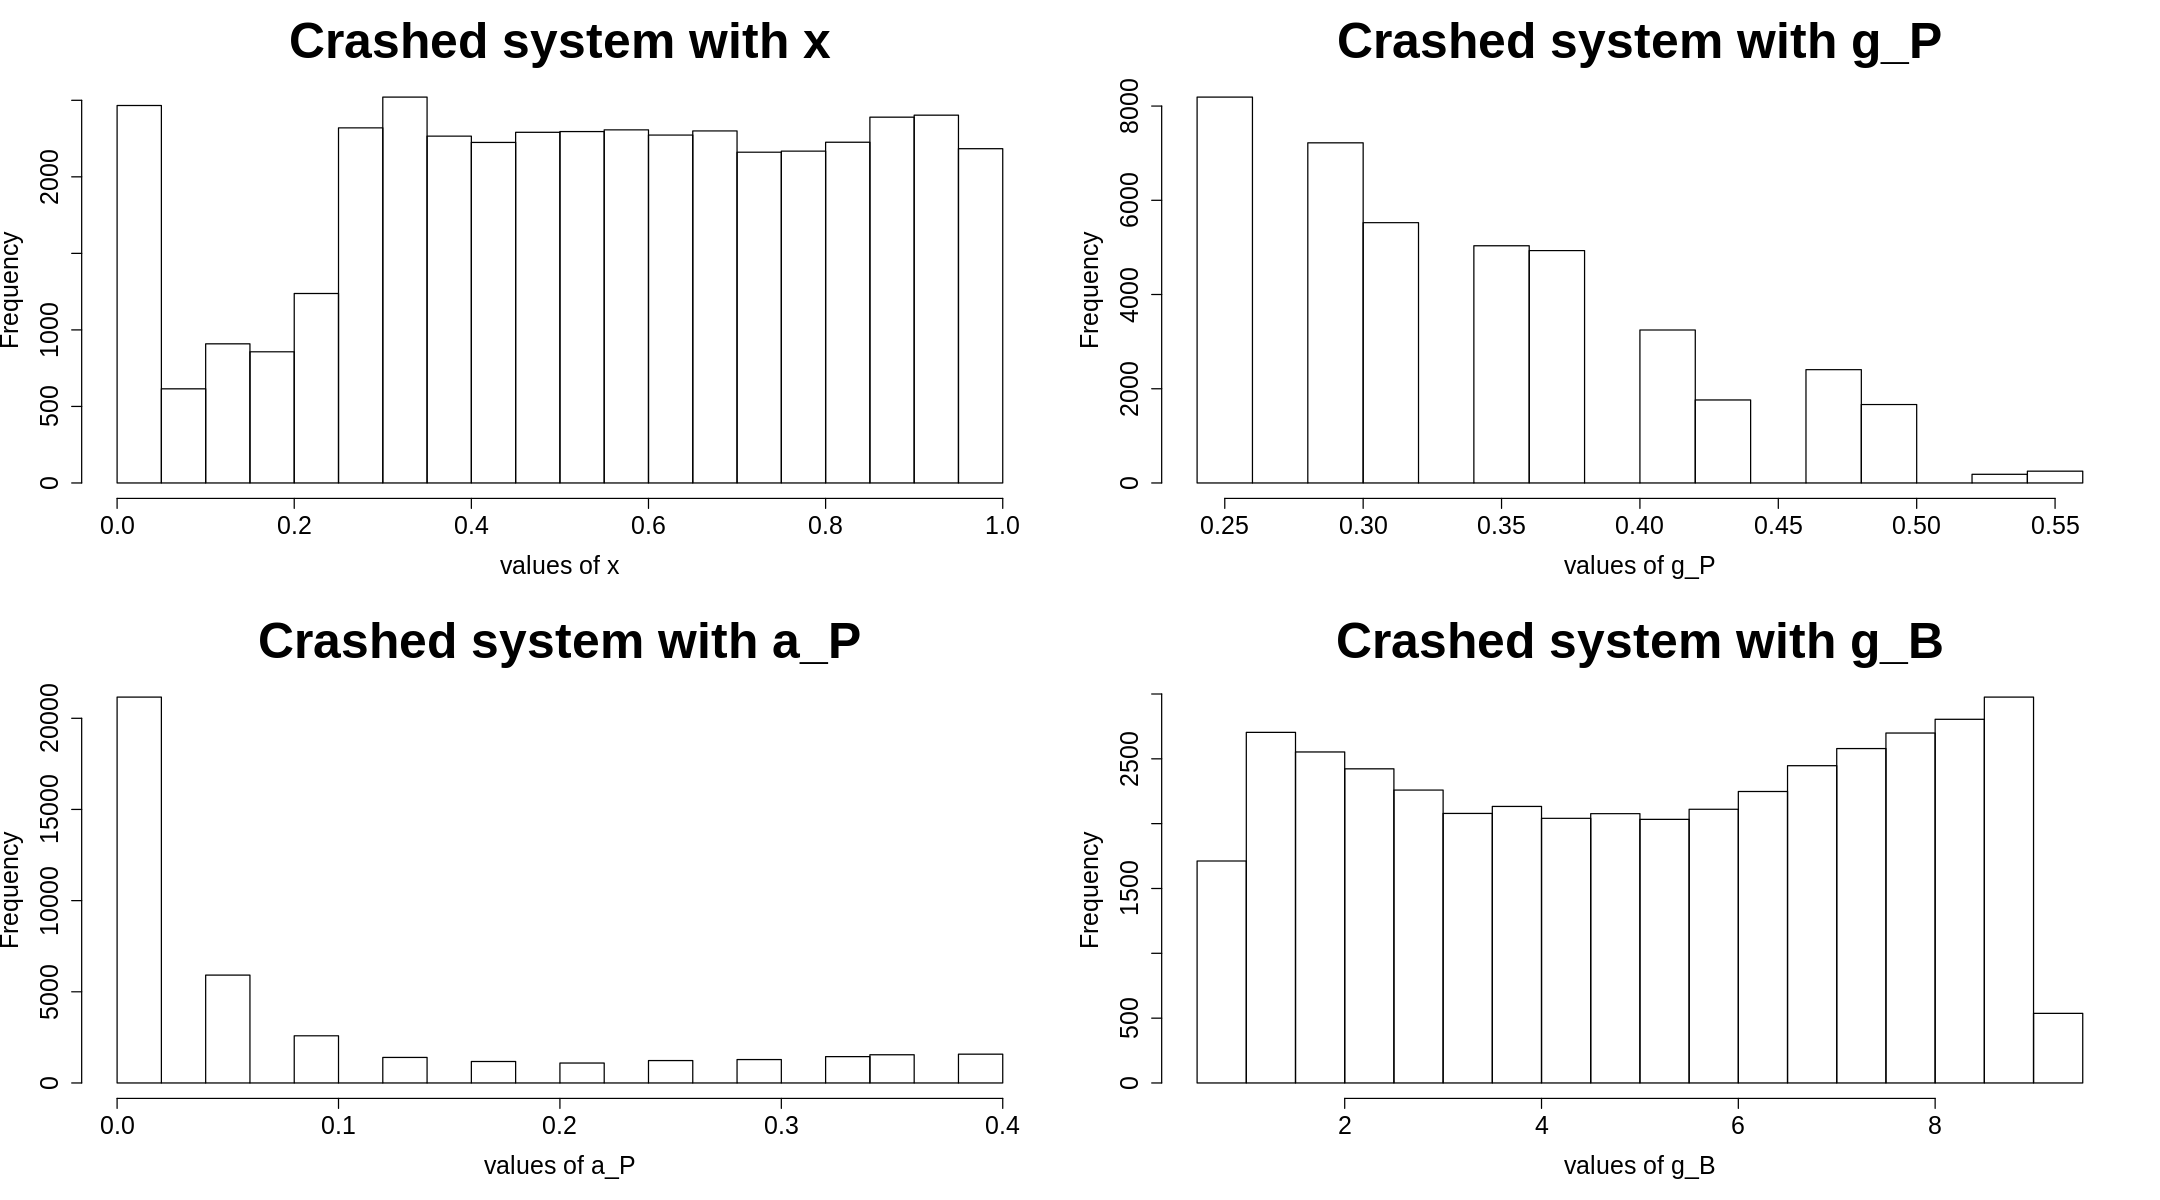

In [7]:
par(mfrow=c(2,2))
for(i in 1:9){if(length(unique(dIsc[,i]))>1){hIst(i)}};rm(i)

# effect of initial condition

In [8]:
#dfTest = dIsc[which(dIsc$x==min(dIsc$x) & dIsc$g_P==min(dIsc$g_P) & dIsc$a_P==min(dIsc$a_P) & dIsc$g_B==min(dIsc$g_B)),]
dfTest = dIsc[which(dIsc$x==min(dIsc$x) & dIsc$g_P==min(dIsc$g_P) & dIsc$a_P==min(dIsc$a_P)),]
dfTest

,x,e_PR,e_P,g_P,a_P,e_BR,e_B,g_B,m_B,eqmC.num.ana,eqmP.num.ana,eqmB.num.ana,eqmA.num.ana
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21,0,0.875,0.63,0.259,0.001,0.6,0.55,2.367,0.14,3.004297e+106,17.34165,-1.358107e+106,1.64619e+106


DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will continue anyway.
In above message, R1 = 208.31, R2 = 1.39552e-14
 
DLSODA-  Warning..Internal T (=R1) and H (=R2) are
      such that in the machine, T + H = T on the next step  
     (H = step size). Solver will co

Warning message in lsoda(y, times, func, parms, ...):
“an excessive amount of work (> maxsteps ) was done, but integration was not successful - increase maxsteps”
Warning message in lsoda(y, times, func, parms, ...):
“Returning early. Results are accurate, as far as they go”


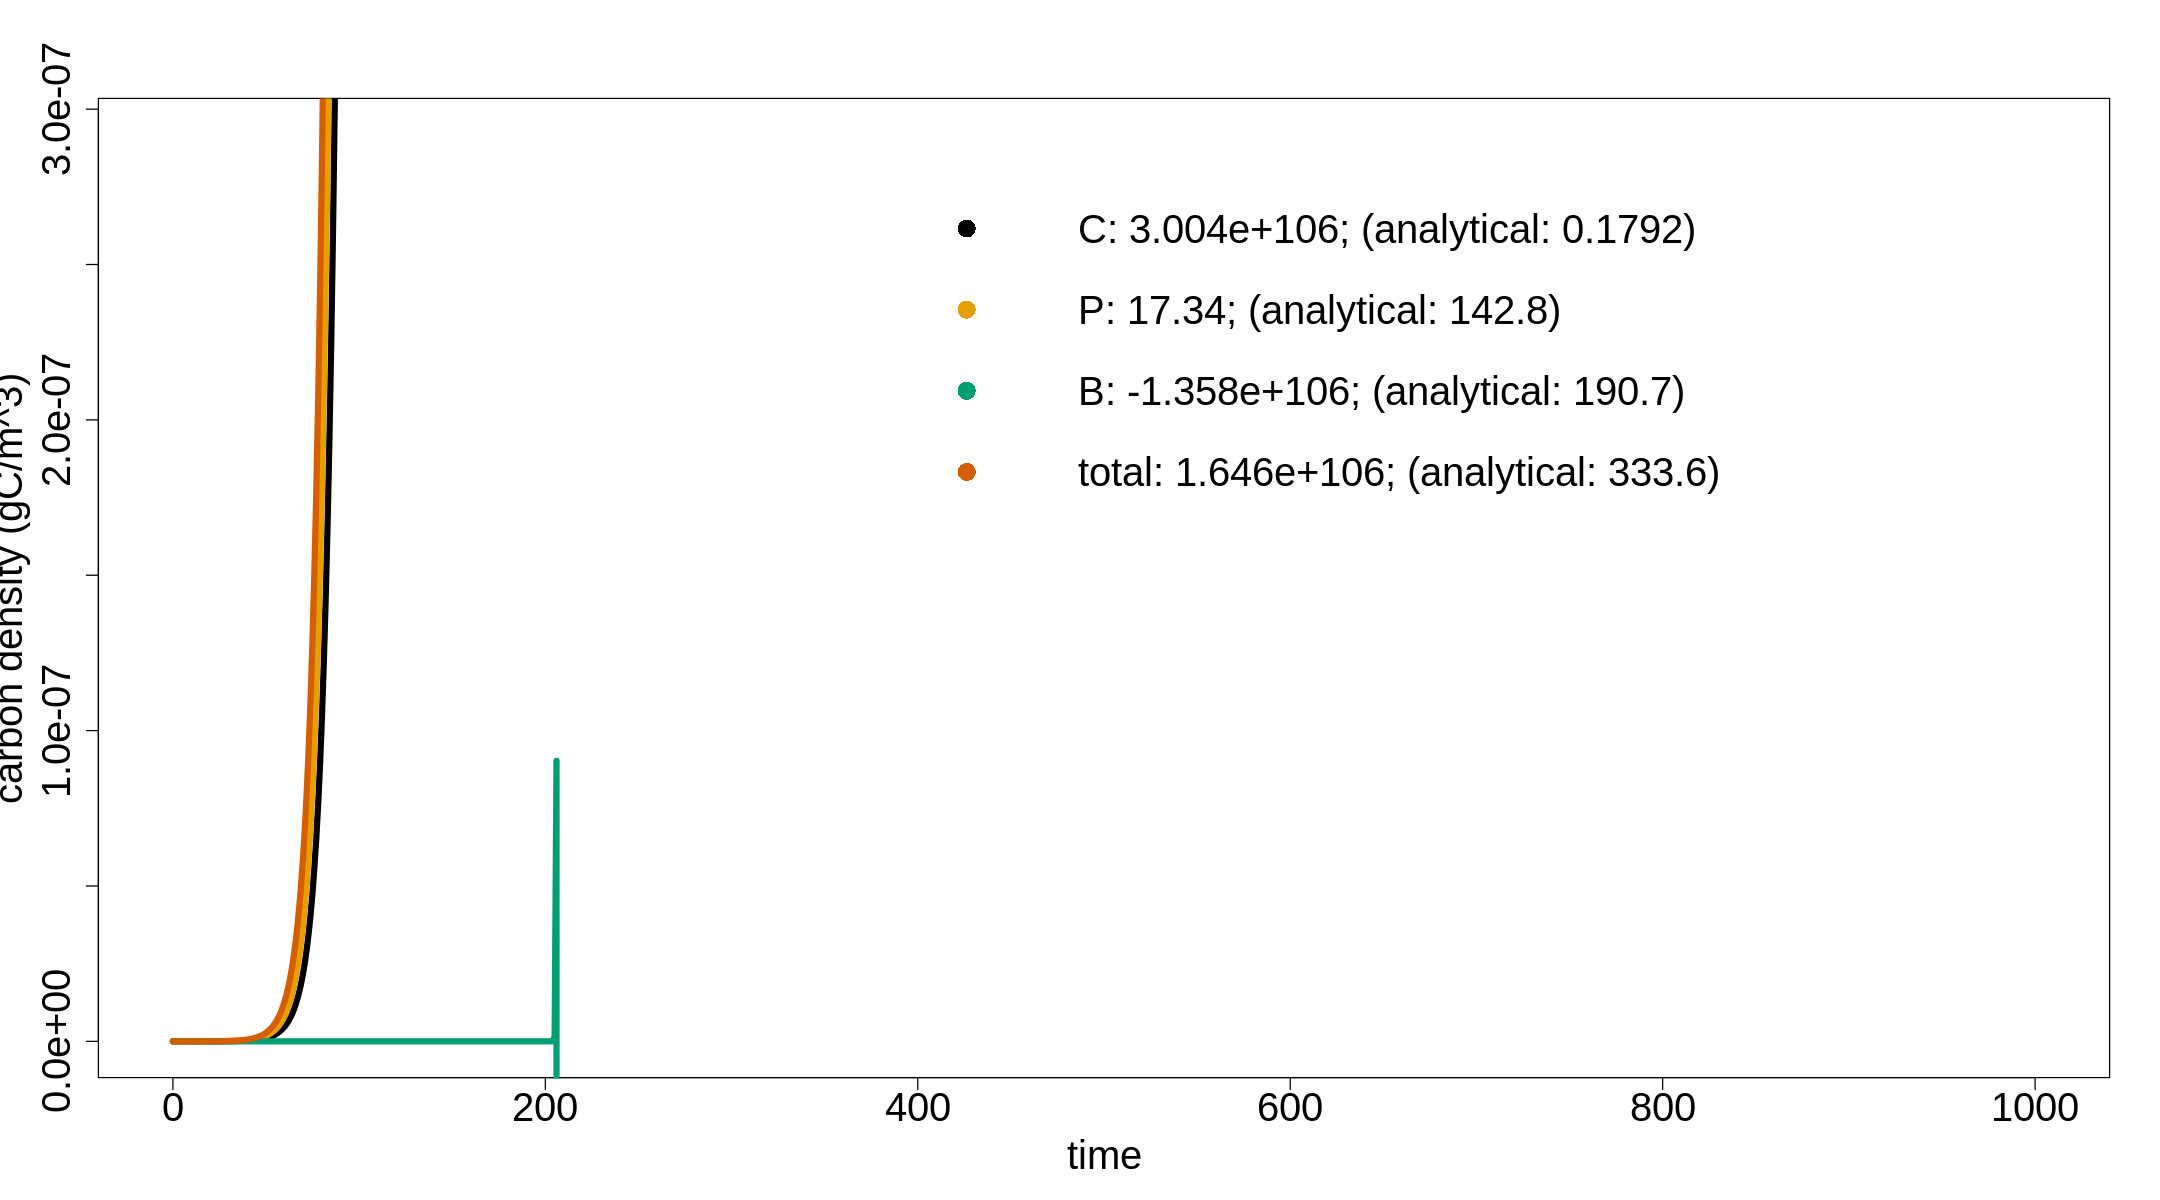

In [9]:
ebcPlt1(df=dfTest)

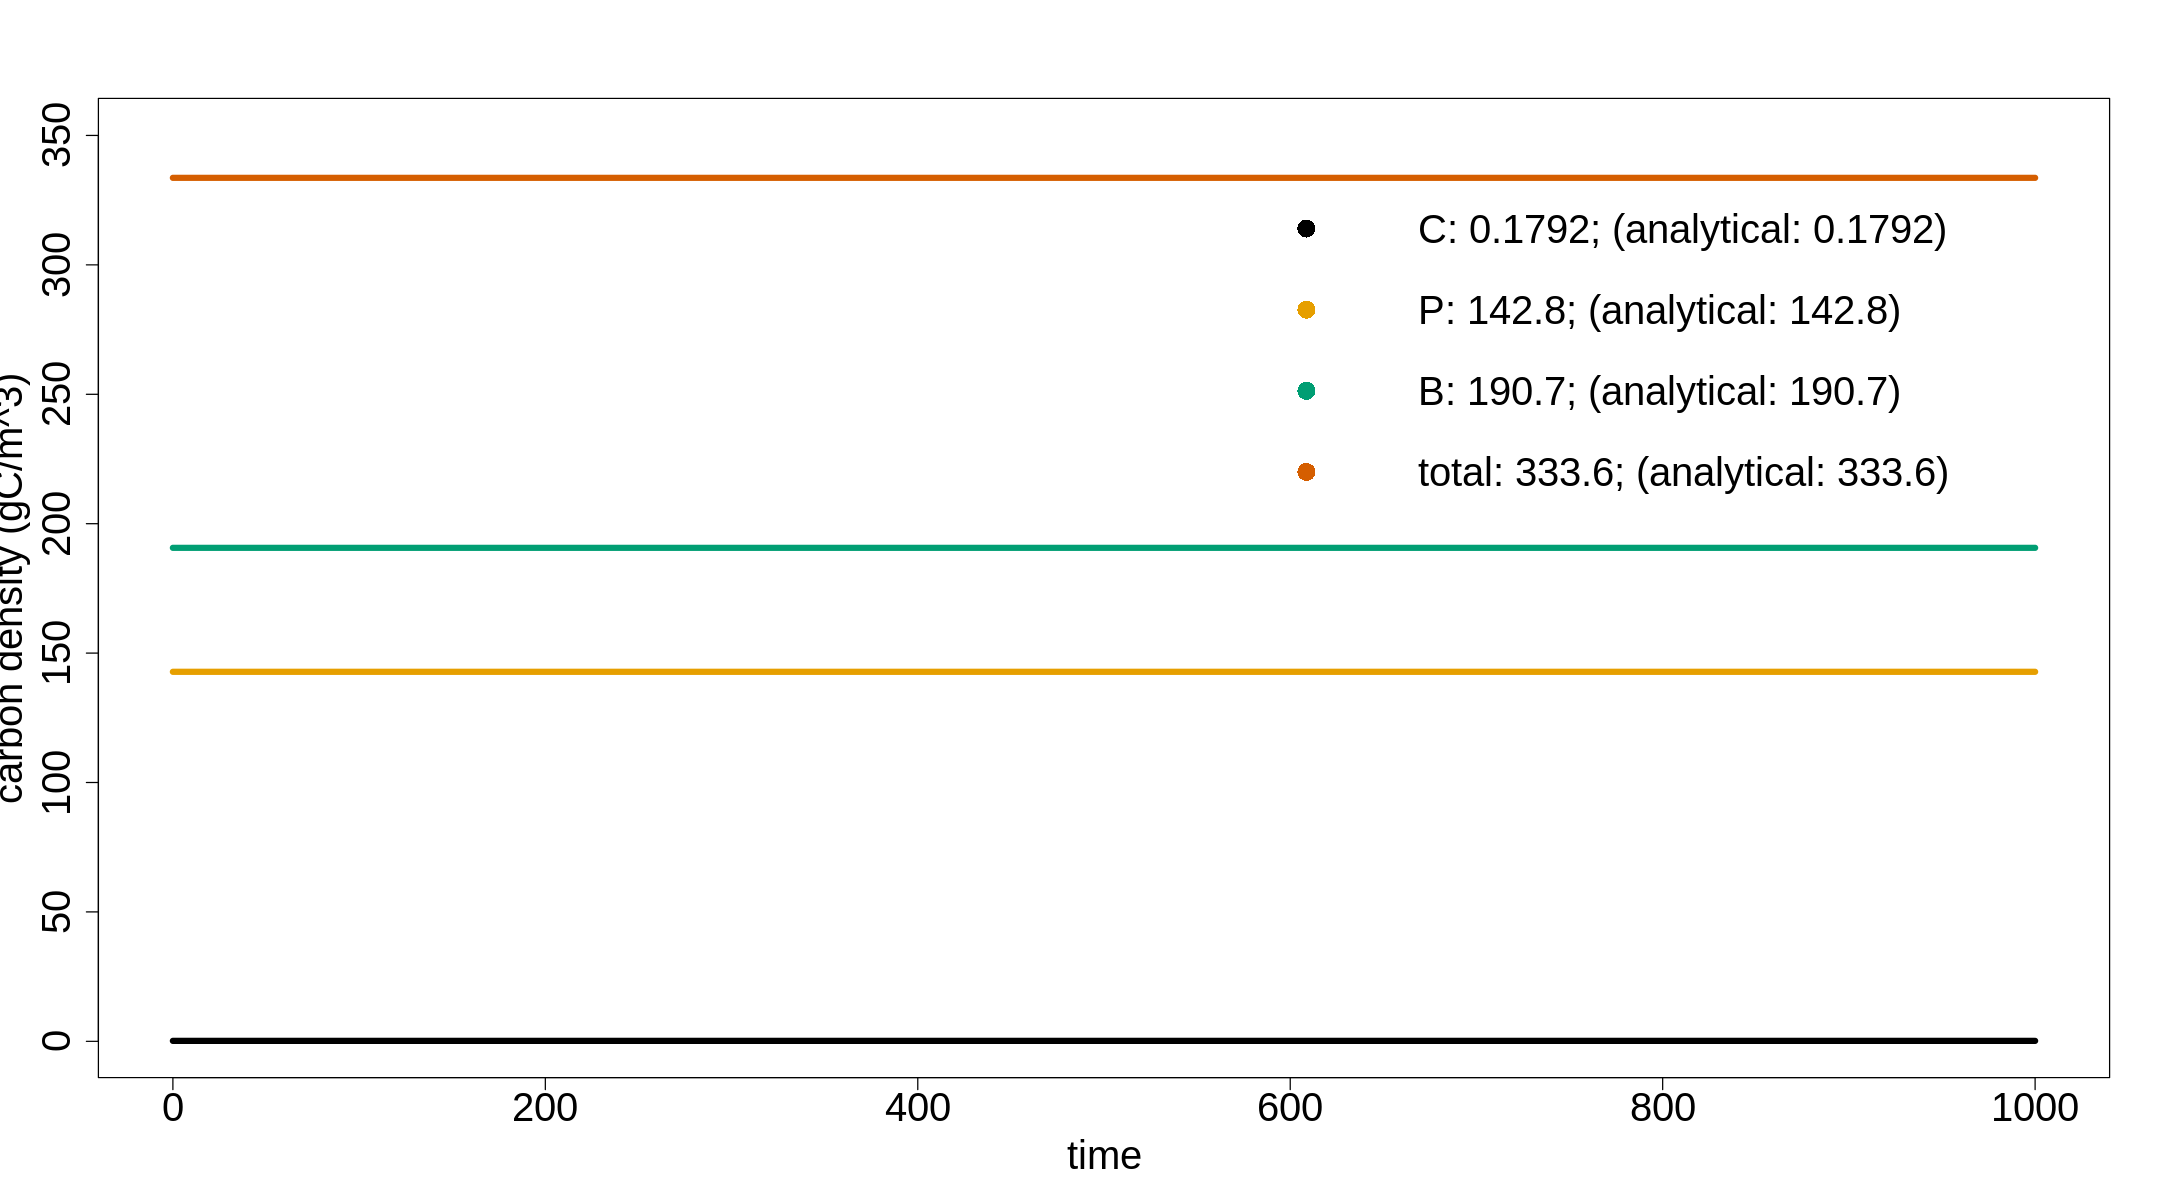

In [10]:
ebcPlt1(iPop=ebcEqm(as.numeric(dfTest[1,])),df=dfTest)

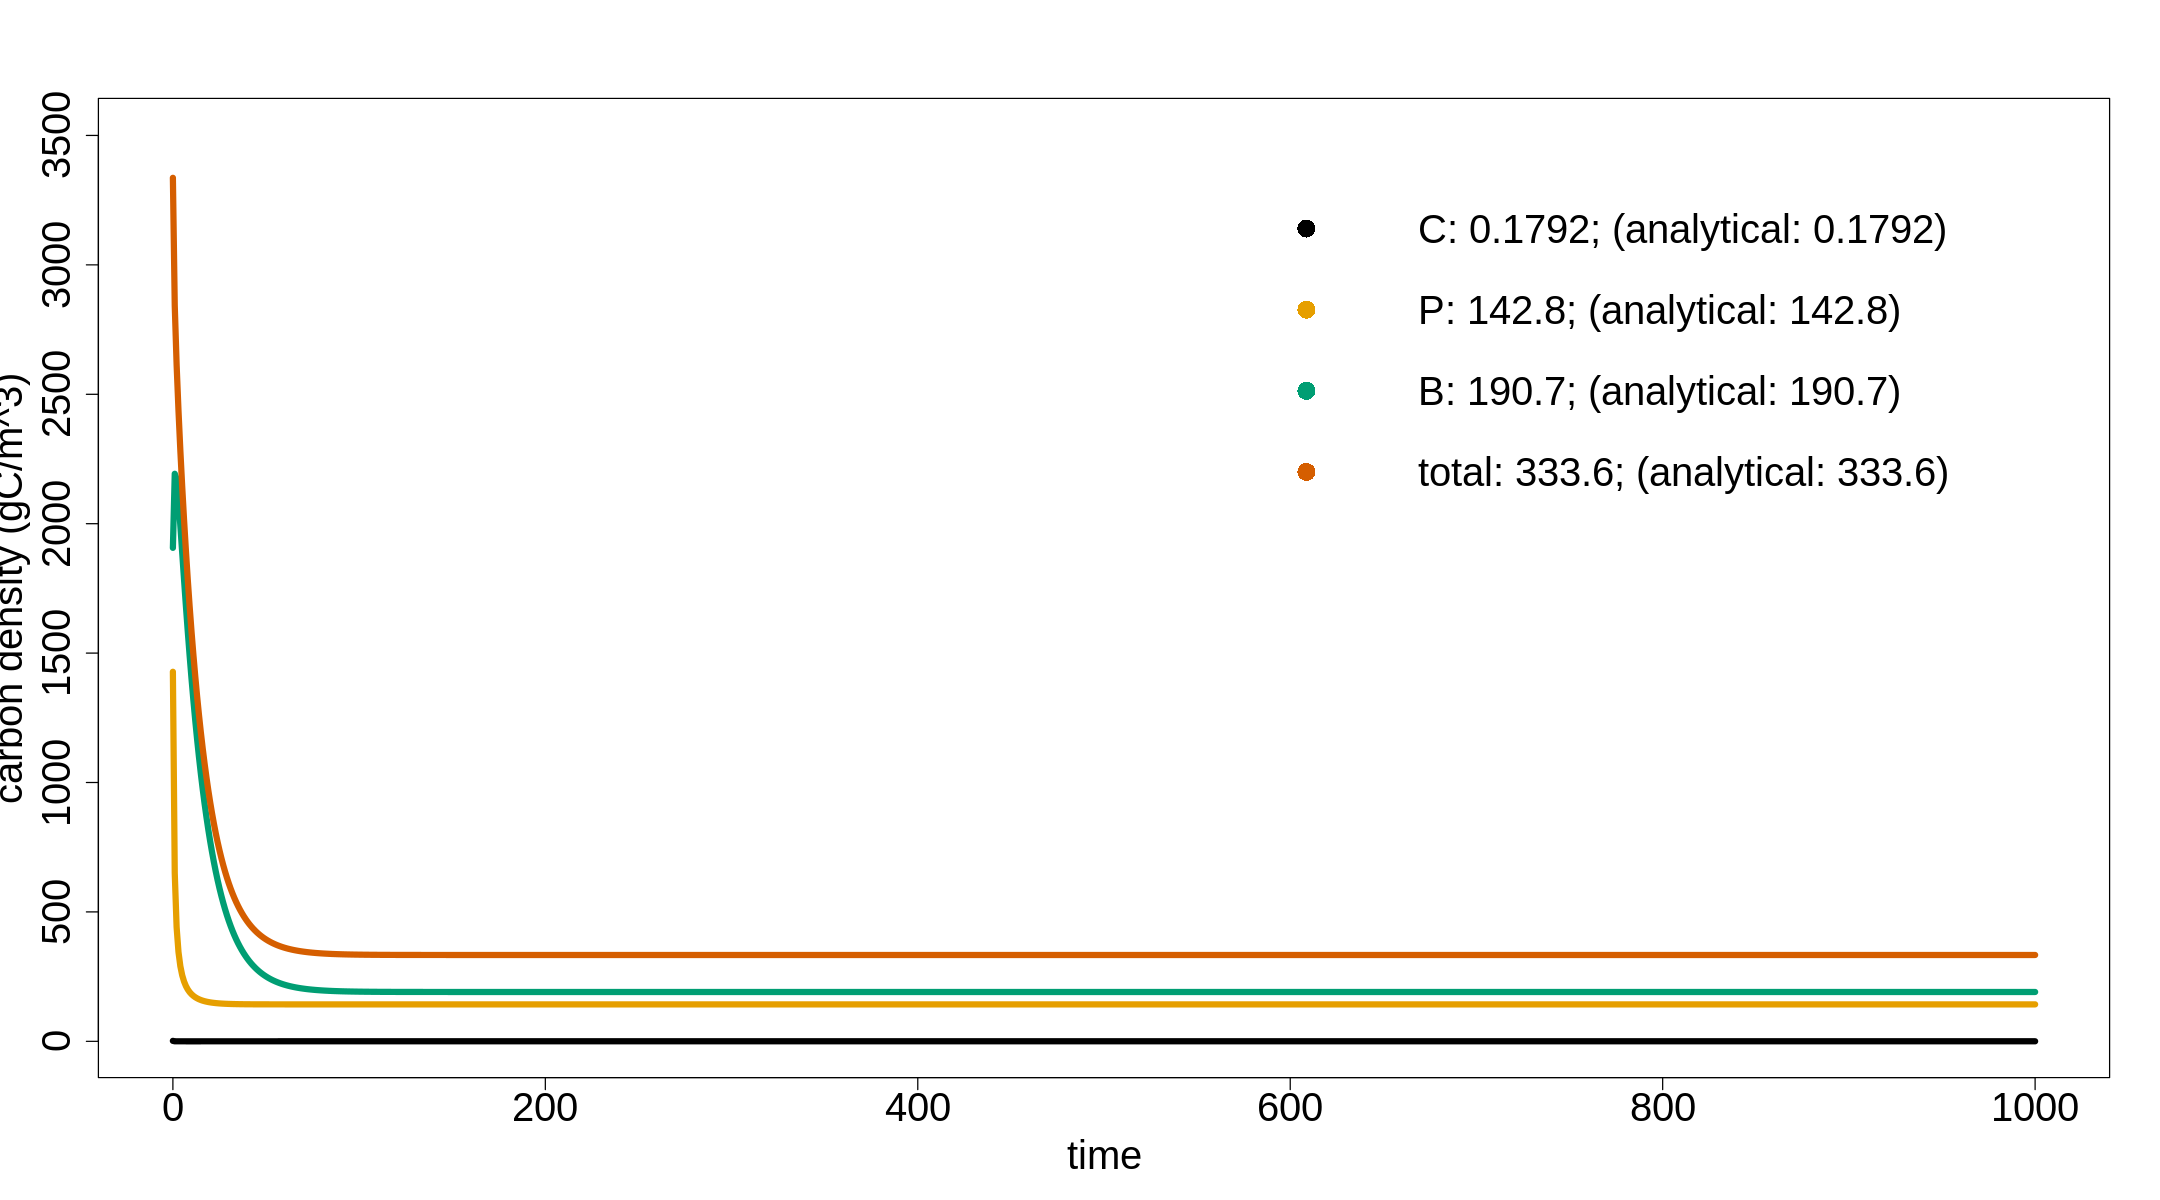

In [11]:
iniP = ebcEqm(as.numeric(dfTest[1,]))
iniP = iniP*10
ebcPlt1(iPop=iniP,df=dfTest)

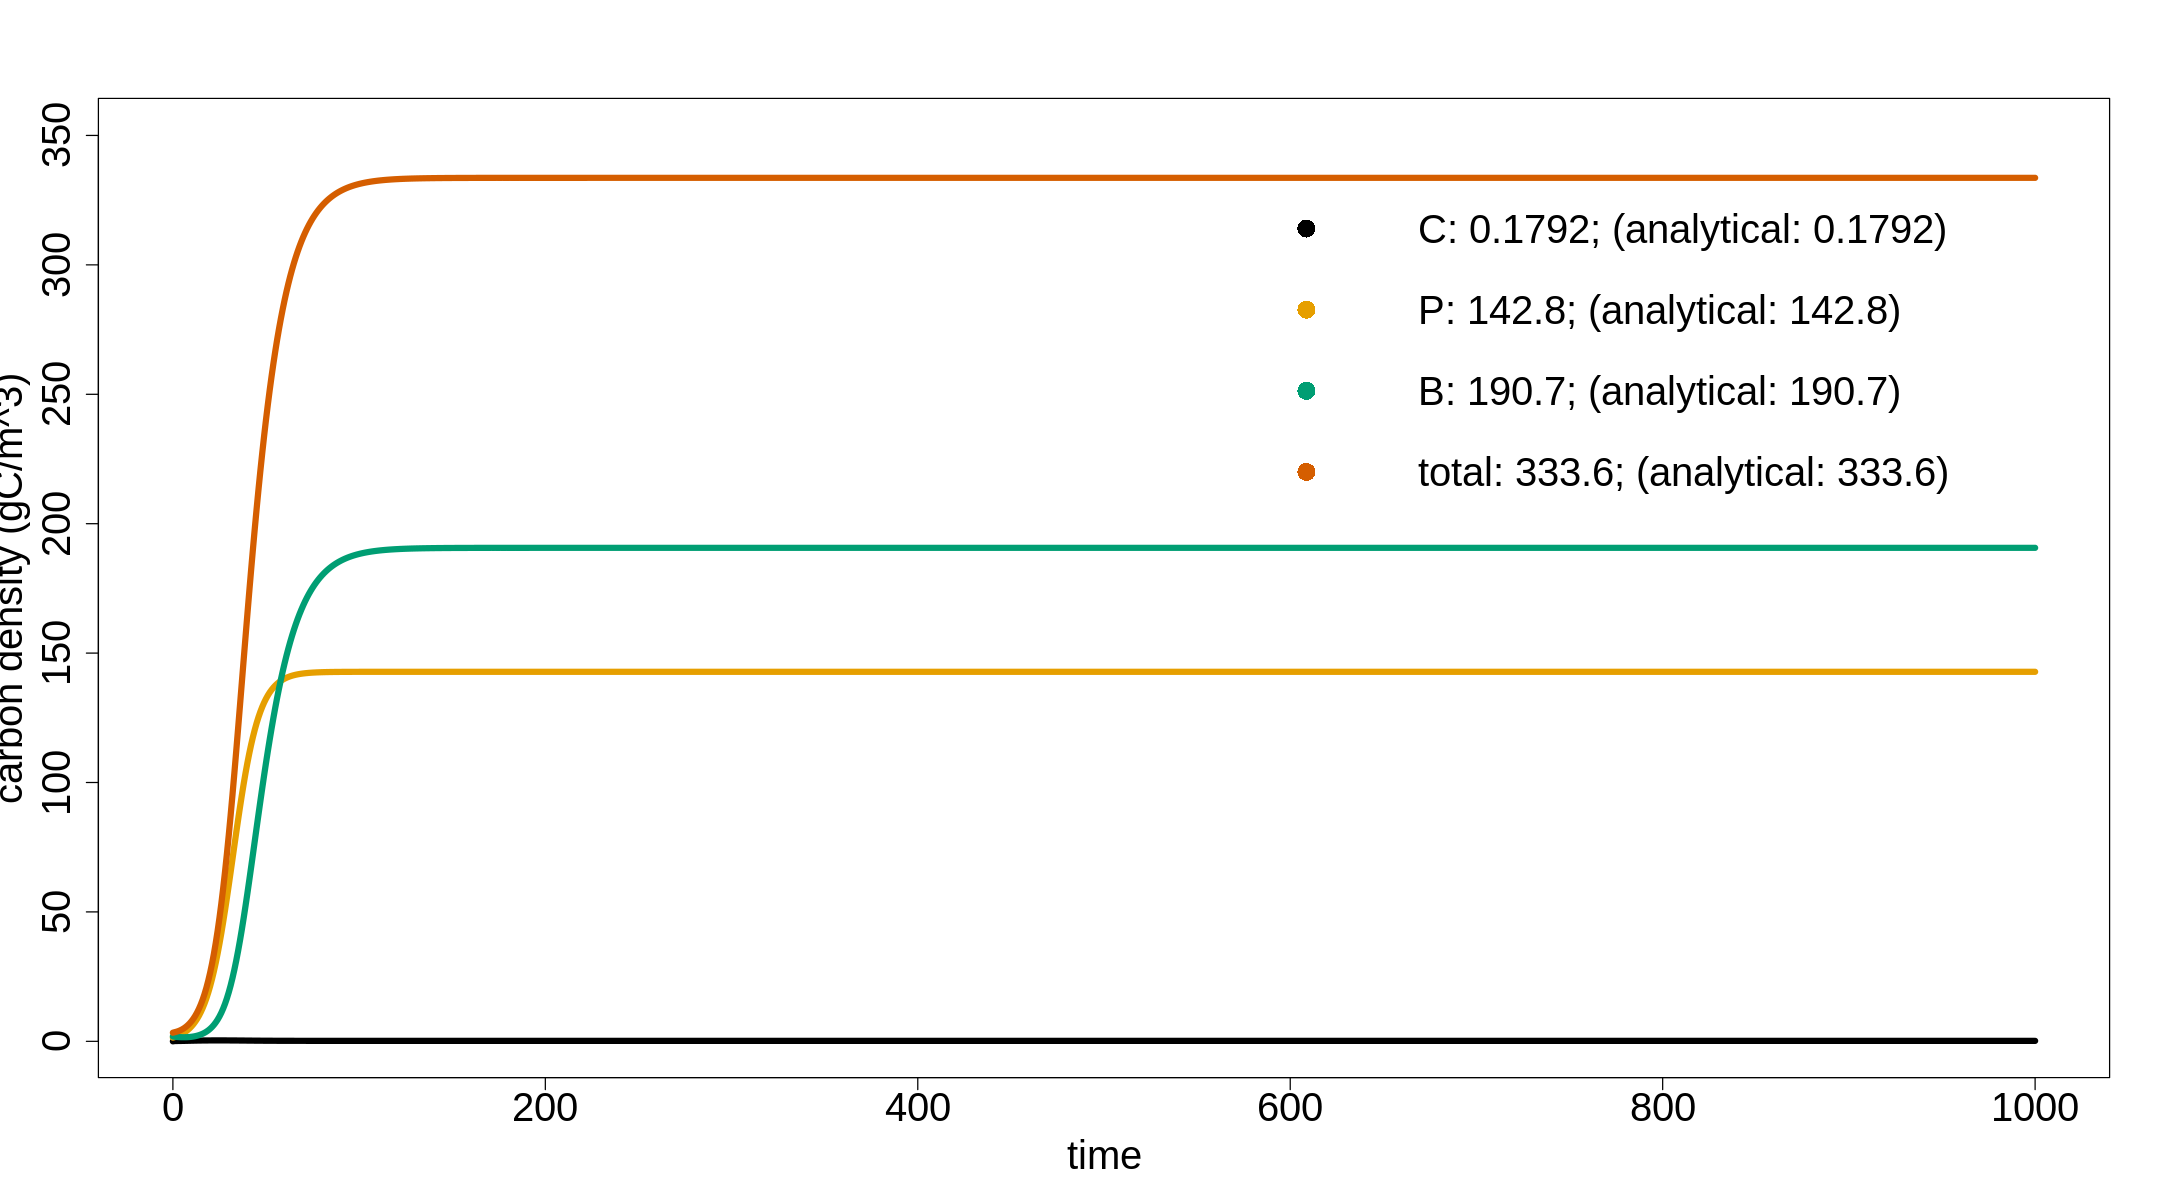

In [12]:
iniP = ebcEqm(as.numeric(dfTest[1,]))
iniP = iniP*.01
ebcPlt1(iPop=iniP,df=dfTest)

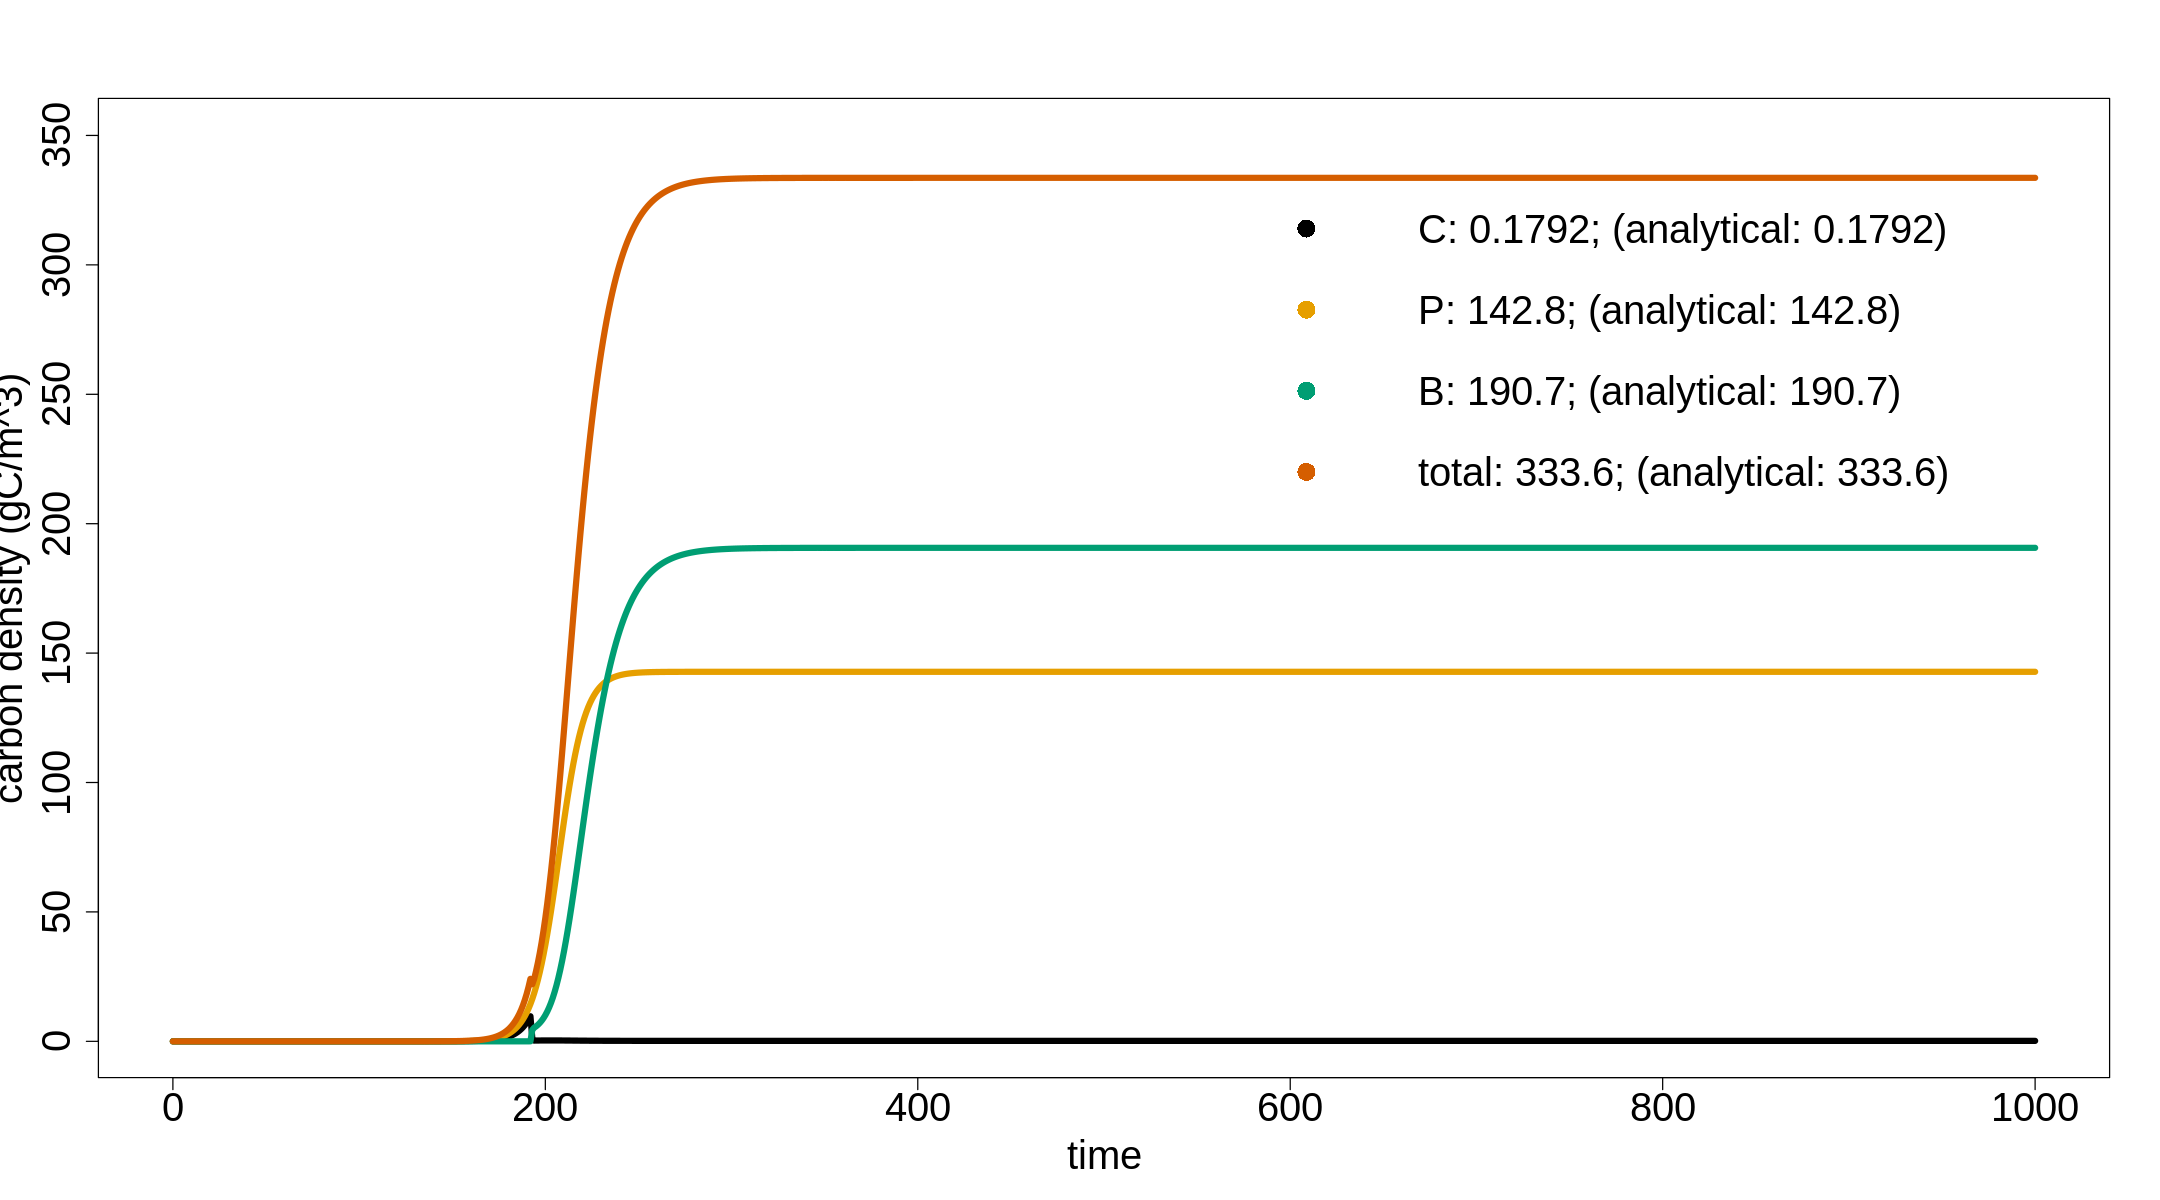

In [13]:
ebcPlt1(iPop=1e-11,df=dfTest)